In [16]:
import os, subprocess, warnings
from datetime import datetime
from tabulate import tabulate

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

from datetime import datetime
from scipy.integrate import quad, quad_vec, trapz, cumtrapz
from scipy.optimize import fsolve
from scipy.ndimage import gaussian_filter
from scipy.special import erf
from scipy.interpolate import griddata, interpn

from sim import *
import const


In [17]:
sim_eps0p01 = Sim(ALPHA_EPS0P01, "gridded_data_small.npz", epsilon_SF=0.01)
sim_eps0p1 = Sim(ALPHA_EPS0P1, "gridded_data_small.npz", epsilon_SF=0.1)
sim_eps1p0 = Sim(ALPHA_EPS1P0, "gridded_data_small.npz", epsilon_SF=1.0)
sim_gas = Sim(GAS, "gridded_data_small.npz", epsilon_SF=None)
list_of_sim = [sim_eps0p01, sim_eps0p1, sim_eps1p0, sim_gas]


Moving to directory '/home/za9132/scratch/romain/alpha_eps0p01'.
Moving to directory '/home/za9132/scratch/romain/alpha_eps0p1'.
Moving to directory '/home/za9132/scratch/romain/alpha_eps1p0'.
Moving to directory '/home/za9132/scratch/romain/gas'.


In [18]:
sim = sim_gas


In [22]:
class Terminal:
    
    def __enter__(self):
        self.cwd = os.getcwd()
        return None
    
    def __exit__(self, exc_type, exc_value, exc_tb):
        os.chdir(self.cwd)


In [19]:
def git_commit(git_message=None):

    cwd = os.getcwd()
    os.chdir(analysis_dir)
    if git_message == None: git_message = "pushing updates to analysis code"

    os.system("git add analysis.ipynb")
    os.system("git add yt_to_numpy.ipynb")
    os.system("git add const.py")
    os.system("git add sim.py")
    os.system("git commit -m '%s'" % git_message)
    os.system("git push")
    os.chdir(cwd)


In [ ]:
def clear_figures():
    
    cwd = os.getcwd()
    

In [4]:
n_dust_sph = sim.interp_to_sph(sim.n_dust)
N_dust = np.sum(n_dust_sph * sim.dr, axis=R)
N_dust_avg = np.sum(N_dust * sim.dA_hph) / np.sum(sim.dA_hph)
N_dust_delta = (N_dust - N_dust_avg) / N_dust_avg


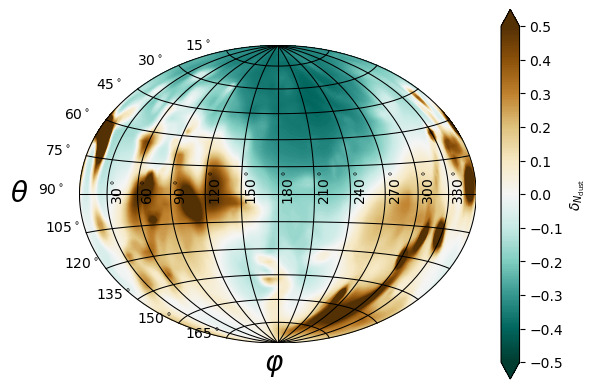

In [5]:
sim.plot_AH(N_dust_delta, (-0.5, 0.5), do_log=False, cmap='BrBG_r', num_axis_lines=12, cbar_tick_increment=0.1, cbar_label=r'$\delta_{N_{\rm dust}}$')
        

Text(0.5, 1.0, '$|z| < 1~{\\rm kpc}$')

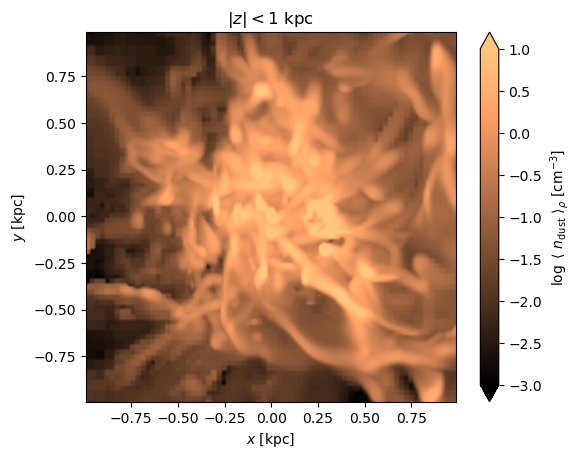

In [21]:
slice = Z
slice_label = ["x", "y", "z"][slice]

sim.plot_slice(n_dust, (1e-3, 1e1), avg=True, slice=slice, weight=sim.density, project=True, do_log=True, cmap='copper', cbar_label=r'$\log~\langle~n_{\rm dust}~\rangle_\rho$ [${\rm cm^{-3}}$]', cbar_tick_increment=0.5)

plt.title(r'$|%s| < 1~{\rm kpc}$' % slice_label)

# sim.save_fig("SFR-proj-%s" % slice_label)


### Projection Plots

Text(0.5, 1.0, '$|z| < 1~{\\rm kpc}$')

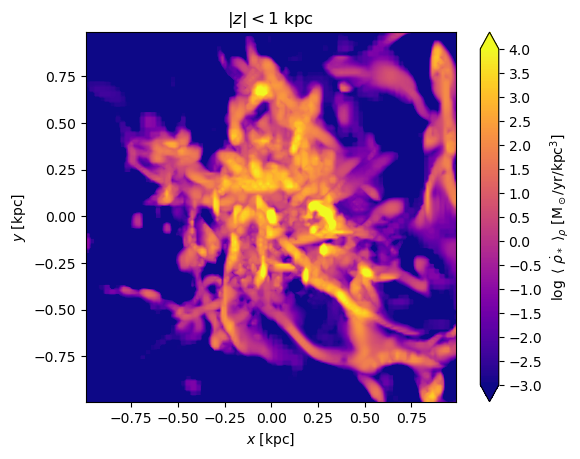

In [31]:
slice = Z
slice_label = ["x", "y", "z"][slice]

sim.plot_slice(sim.SFR_density / (const.M_sol / const.yr / const.kpc**3), (1e-3, 1e4), avg=True, slice=slice, weight=sim.density, project=True, do_log=True, cmap='plasma', cbar_label=r'$\log~\langle~\dot{\rho}_*~\rangle_\rho$ [${\rm M_\odot/yr/kpc^3}$]', cbar_tick_increment=0.5)

plt.title(r'$|%s| < 1~{\rm kpc}$' % slice_label)

# sim.save_fig("SFR-proj-%s" % slice_label)


Text(0.5, 1.0, '$|z| < 1~{\\rm kpc}$')

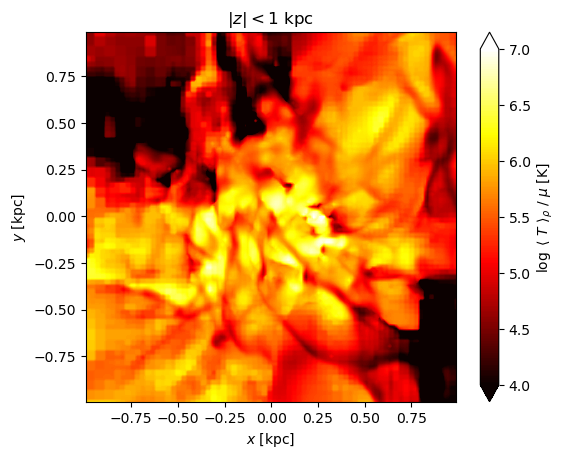

In [5]:
slice = Z
slice_label = ["x", "y", "z"][slice]

sim.plot_slice(sim.temperature, (1e4, 1e7), avg=True, slice=slice, weight=sim.density, project=True, do_log=True, cmap='hot', cbar_label=r'$\log~\langle~T~\rangle_\rho~/~\mu$ [K]', cbar_tick_increment=0.5)

plt.title(r'$|%s| < 1~{\rm kpc}$' % slice_label)

# sim.save_fig("temp-proj-%s" % slice_label)


Saved figure as 'metal-proj-z-092720231136.png'


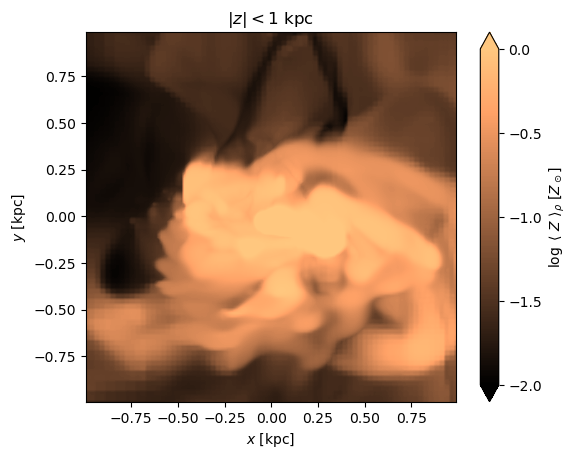

In [120]:
slice = Z
slice_label = ["x", "y", "z"][slice]

sim.plot_slice(sim.metallicity / const.Z_sol, (1e-2, 1e0), avg=True, slice=slice, weight=sim.density, project=True, do_log=True, cmap='copper', cbar_label=r'$\log~\langle~Z~\rangle_\rho$ [$Z_\odot$]', cbar_tick_increment=0.5)

plt.title(r'$|%s| < 1~{\rm kpc}$' % slice_label)

# sim.save_fig("metal-proj-%s" % slice_label)


Text(0.5, 1.0, '$|z| < 1~{\\rm kpc}$')

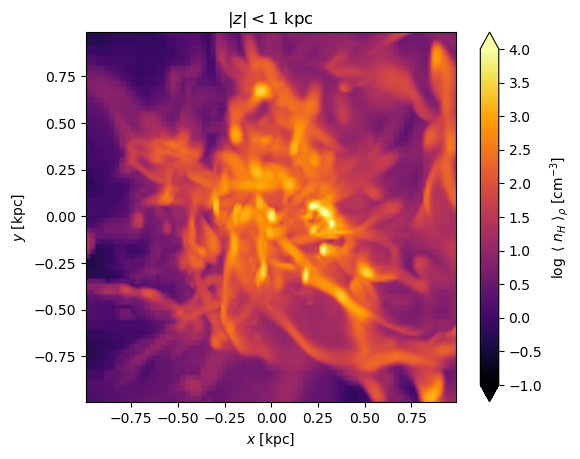

In [29]:
slice = Z
slice_label = ["x", "y", "z"][slice]

sim.plot_slice(sim.n_H, (1e-1, 1e4), avg=True, slice=slice, weight=sim.density, project=True, do_log=True, cmap='inferno', cbar_label=r'$\log~\langle~n_H~\rangle_\rho$ [${\rm cm^{-3}}$]', cbar_tick_increment=0.5)

plt.title(r'$|%s| < 1~{\rm kpc}$' % slice_label)

# sim.save_fig("density-proj-%s" % slice_label)


Saved figure as 'v-proj-z-092720231136.png'


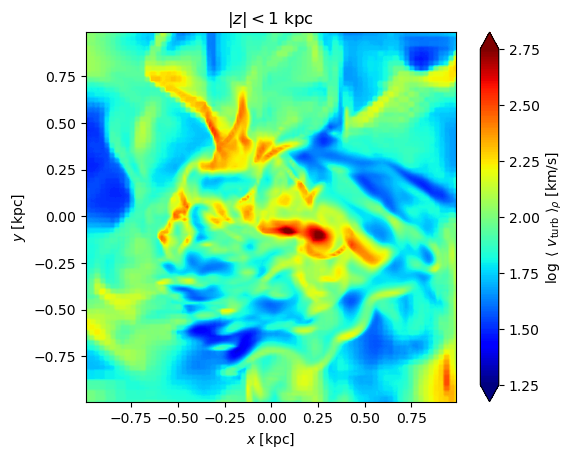

In [126]:
slice = Z
slice_label = ["x", "y", "z"][slice]

sim.plot_slice(sim.v_turb / (const.km), (10**(1.25), 10**(2.75)), avg=True, slice=slice, weight=sim.density, project=True, do_log=True, cmap='jet', cbar_label=r'$\log~\langle~v_{\rm turb}~\rangle_\rho$ [km/s]', cbar_tick_increment=0.25)

plt.title(r'$|%s| < 1~{\rm kpc}$' % slice_label)

# sim.save_fig("v-proj-%s" % slice_label)


Saved figure as 'mach-proj-z-092720231136.png'


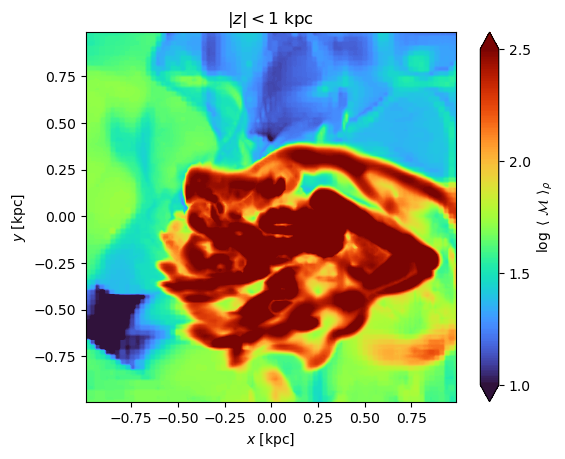

In [129]:
slice = Z
slice_label = ["x", "y", "z"][slice]

sim.plot_slice(sim.mach, (10**(1.), 10**(2.5)), avg=True, slice=slice, weight=sim.density, project=True, do_log=True, cmap='turbo', cbar_label=r'$\log~\langle~\mathcal{M}~\rangle_\rho$', cbar_tick_increment=0.5)

plt.title(r'$|%s| < 1~{\rm kpc}$' % slice_label)

# sim.save_fig("mach-proj-%s" % slice_label)


Saved figure as 'refine-proj-z-092720231136.png'


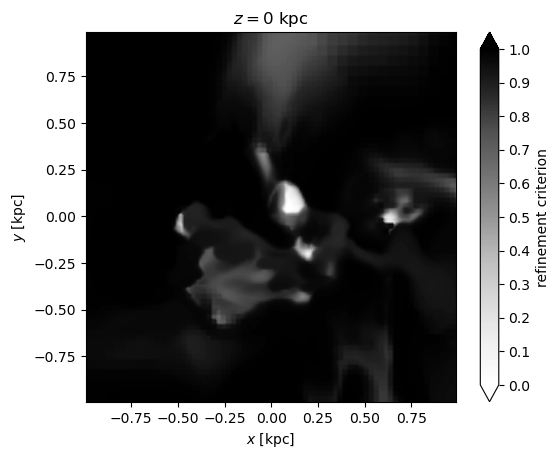

In [132]:
slice = Z
slice_label = ["x", "y", "z"][slice]

sim.plot_slice(sim.refinement_criterion, (0, 1), slice=slice, project=False, do_log=False, cmap='Greys', cbar_label='refinement criterion', cbar_tick_increment=0.1)

plt.title(r'$%s = 0~{\rm kpc}$' % slice_label)

# sim.save_fig("refine-proj-%s" % slice_label)


In [133]:
n_H_2d, temperature_2d, mass_2d = sim.calc_phase(sim.n_H, sim.temperature, (1e-4, 1e5), (1e1, 1e9), nbins=200)


Saved figure as 'density-temp-phase-092720231137.png'


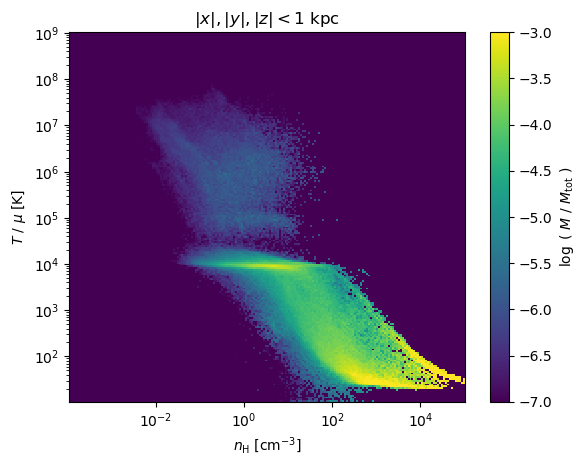

In [134]:
mass_frac_2d = mass_2d / np.sum(sim.density * sim.dV)

plt.pcolor(n_H_2d, temperature_2d, np.log10(mass_frac_2d + epsilon), vmin=-7, vmax=-3)

plt.xlabel(r"$n_{\rm H}$ [${\rm cm^{-3}}$]")
plt.ylabel(r"$T~/~\mu$ [K]")

plt.xscale('log')
plt.yscale('log')

plt.colorbar(label=r'$\log~(~M~/~M_{\rm tot}~)$')

plt.title(r'$|x|, |y|, |z| < 1~{\rm kpc}$')

# sim.save_fig("density-temp-phase")


In [135]:
r_1d, density_1d = sim.calc_radial_profile(sim.density, nbins=100)


Saved figure as 'density-1d-092720231137.png'


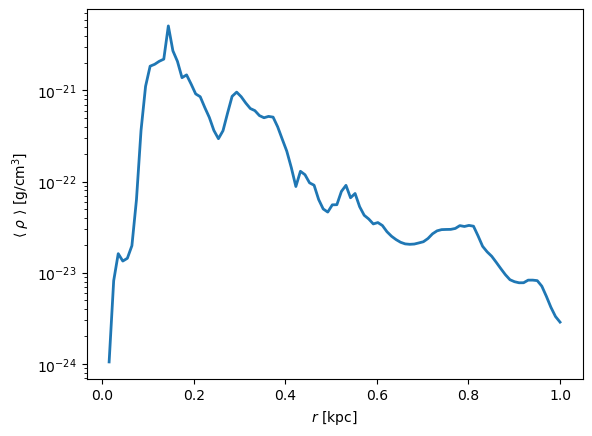

In [136]:
plt.plot(r_1d / const.kpc, density_1d, lw=2)

plt.xlabel(r'$r$ [kpc]')
plt.ylabel(r'$\langle~\rho~\rangle$ [${\rm g/cm^3}$]')

plt.yscale('log')

# sim.save_fig("density-1d")


In [137]:
r_1d, temperature_1d = sim.calc_radial_profile(sim.temperature, weight=sim.density, nbins=100)


Saved figure as 'temp-1d-092720231137.png'


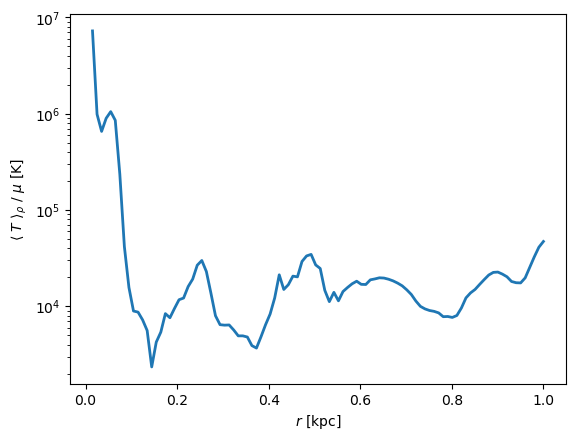

In [138]:
plt.plot(r_1d / const.kpc, temperature_1d, lw=2)

plt.xlabel(r'$r$ [kpc]')
plt.ylabel(r'$\langle~T~\rangle_\rho~/~\mu$ [K]')

plt.yscale('log')

# sim.save_fig("temp-1d")


In [139]:
r_1d, turb_energy_1d = sim.calc_radial_profile(sim.turb_energy, weight=sim.density, nbins=100)
v_turb_1d = np.sqrt(2 * turb_energy_1d)


Saved figure as 'v-turb-1d-092720231137.png'


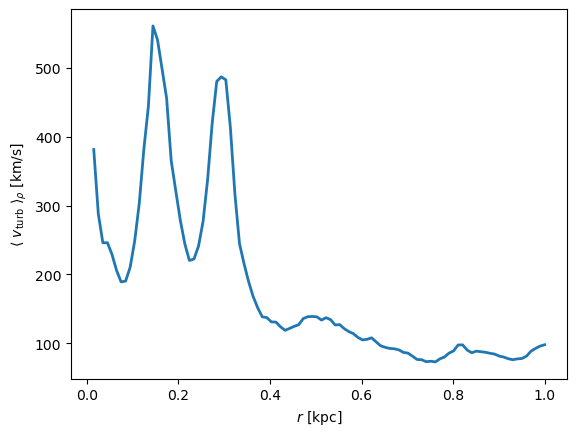

In [140]:
plt.plot(r_1d / const.kpc, v_turb_1d / (const.km), lw=2)

plt.xlabel(r'$r$ [kpc]')
plt.ylabel(r'$\langle~v_{\rm turb}~\rangle_\rho$ [km/s]')

# sim.save_fig("v-turb-1d")


In [141]:
stats = {
    'fields': [sim.density, sim.temperature, sim.metallicity / const.Z_sol, sim.v_turb / const.km, sim.mach, sim.star_age / const.Myr],
    'names': ["density", "temperature", "metallicity", "turbulent velocity", "mach number", "star age"],
    'units': ["g/cm^3", "K", "Z_sol", "km/s", "", "Myr"],
    'weights': [None, sim.density, sim.density, sim.density, sim.density, sim.star_mass],
    'types': [HYDRO, HYDRO, HYDRO, HYDRO, HYDRO, STAR]
}

sim.calc_summary_stats(**stats, do_print=True)



Field                            Max        Min          Mean  Unit
-----------------------  -----------  ---------  ------------  ------
density                     1.13e-18   1.78e-28       3.7e-23  g/cm^3
temperature                 3.98e+08  10.1        11700        K
metallicity                 8.72       0.0055         1        Z_sol
turbulent velocity       3210         11.5          234        km/s
mach number              1690          0.00525      512
star age                  297          0.802         60.2      Myr
star part number            0          0         116000
dark matter part number     0          0         300000
contamination frac          0          0              0


Saved figure as 'density-compare-092720231131.png'


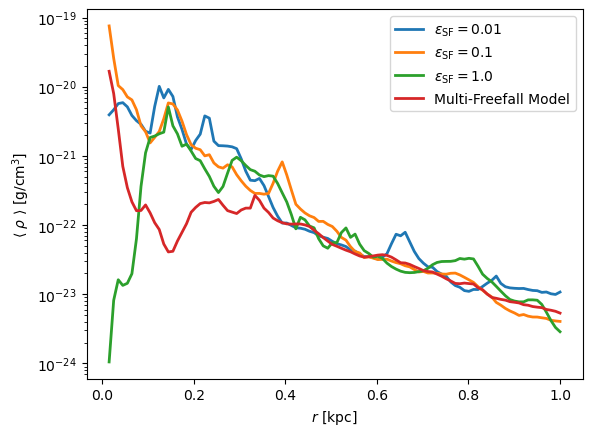

In [54]:
for sim in list_of_sim:
    
    r_1d, density_1d = sim.calc_radial_profile(sim.density, nbins=100)

    plt.plot(r_1d / const.kpc, density_1d, lw=2, label=sim.sim_latex)
    
plt.xlabel(r'$r$ [kpc]')
plt.ylabel(r'$\langle~\rho~\rangle$ [${\rm g/cm^3}$]')

plt.legend()

plt.yscale('log')

# save_fig('density-compare')


Saved figure as 'v-turb-compare-092720231130.png'


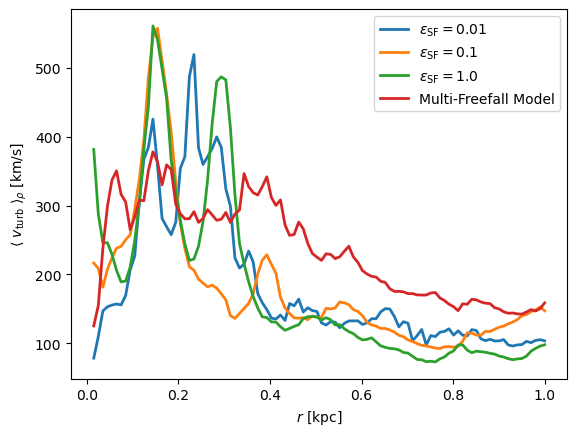

In [53]:
for sim in list_of_sim:
    
    r_1d, turb_energy_1d = sim.calc_radial_profile(sim.turb_energy, weight=sim.density, nbins=100)
    v_turb_1d = np.sqrt(2 * turb_energy_1d)

    plt.plot(r_1d / const.kpc, v_turb_1d / (const.km), lw=2, label=sim.sim_latex)

plt.xlabel(r'$r$ [kpc]')
plt.ylabel(r'$\langle~v_{\rm turb}~\rangle_\rho$ [km/s]')

plt.legend()

# save_fig('v-turb-compare')


Saved figure as 'temp-compare-092720231130.png'


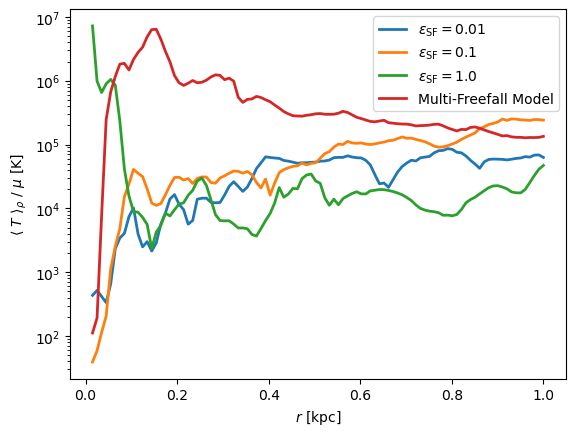

In [52]:
for sim in list_of_sim:
    
    r_1d, temperature_1d = sim.calc_radial_profile(sim.temperature, weight=sim.density, nbins=100)

    plt.plot(r_1d / const.kpc, temperature_1d, lw=2, label=sim.sim_latex)
    
plt.xlabel(r'$r$ [kpc]')
plt.ylabel(r'$\langle~T~\rangle_\rho~/~\mu$ [K]')

plt.legend()

plt.yscale('log')

# save_fig('temp-compare')


Saved figure as 'SFR-compare-092720231119.png'


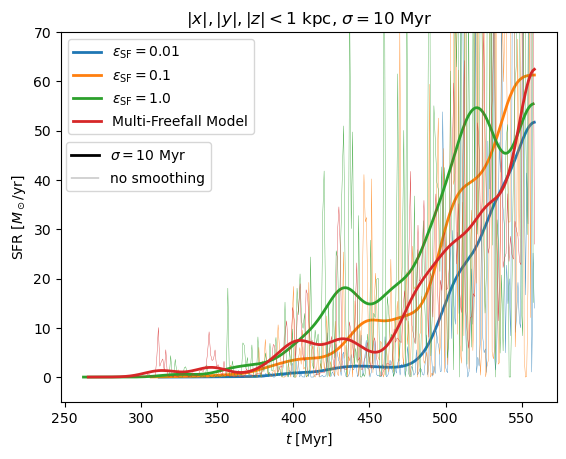

In [7]:
nbins = 300
filter_sigma = 10 * const.Myr

for i, sim in enumerate(list_of_sim):

    counts, bins = np.histogram(sim.star_birth_time, bins=nbins, weights=sim.star_mass)

    star_birth_time_1d = bins[:-1] + np.diff(bins)[0]
    star_mass_1d = counts
    SFR_mass_1d = star_mass_1d / np.diff(bins)[0]

    filter_sigma_idx = filter_sigma / np.diff(star_birth_time_1d)[0]
    SFR_mass_1d_smoothed = gaussian_filter(SFR_mass_1d, sigma=filter_sigma_idx)
    
    plt.plot(star_birth_time_1d / const.Myr, SFR_mass_1d / const.M_sol * const.yr, lw=0.25, alpha=1., color='C%d' % i)
    plt.plot(star_birth_time_1d / const.Myr, SFR_mass_1d_smoothed / const.M_sol * const.yr, lw=2, label=sim.sim_latex, color='C%d' % i)

plt.ylabel(r"SFR [$M_\odot / {\rm yr}$]")
plt.xlabel(r"$t$ [Myr]")

legend1 = plt.legend()
custom_lines = [Line2D([0], [0], color='black', lw=2), Line2D([0], [0], color='black', lw=0.25)]
legend2 = plt.legend(custom_lines, [r'$\sigma=10~{\rm Myr}$', 'no smoothing'], loc=[0.01, 0.57])
plt.gca().add_artist(legend1)

plt.ylim(-5, 70)

plt.title(r'$|x|, |y|, |z| < 1~{\rm kpc}$, $\sigma = 10~{\rm Myr}$')

# save_fig('SFR-compare')


In [118]:
def calc_SFR_density(epsilon_SF=None):
    '''
    Compute the star formation rate density.
    
    See Federrath&Klessen2012 (https://arxiv.org/pdf/1209.2856.pdf) and Kretschmer&Teyssier2021 (https://arxiv.org/pdf/1906.11836.pdf) for details.
    b varies smoothly between b ~ 1/3 for purely solenoidal (divergence-free) forcing 
    and b ~ 1 for purely compressive (curl-free) forcing of the turbulence
    A sochastic mixture of forcing modes in 3-d space leads to b ~ 0.4
    '''
    if epsilon_SF == None:
    
        b = 1. # turbulence forcing parameter
        v_turb_1d = sim.v_turb / np.sqrt(3) # 1-d turbulent velocity
        mach_turb = v_turb_1d / sim.c_s # turbulent Mach number
        alpha_vir = 15 / np.pi * sim.c_s**2 * (1 + mach_turb**2) / (const.G * sim.density * sim.dx**2) # virial parameter
        s_crit = np.log(alpha_vir * (1 + (2 * mach_turb**4) / (1 + mach_turb**2))) # lognormal critical density for star formation
        sigma_s = np.sqrt(np.log(1 + b**2 * mach_turb**2)) # standard deviation of the lognormal subgrid density distribution
        epsilon_SF = 1/2 * np.exp(3/8 * sigma_s**2) * (1 + erf((sigma_s**2 - s_crit) / np.sqrt(2 * sigma_s**2))) # star formation efficiency
    
    t_ff = np.sqrt(3 * np.pi / (32 * const.G * sim.density)) # freefall time
    SFR_density = epsilon_SF * sim.density / t_ff # star formation rate
